# Predicting the outcomes of football matches and the number of goals. $\hspace{2cm}$     Global changers 2018.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from pylab import rcParams
from scipy.stats import poisson, skellam

In [140]:
df = pd.read_csv('D1.csv')

[Dataset description](http://www.football-data.co.uk/notes.txt)

In [139]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,STHG,STAG
0,D1,24/08/18,Bayern Munich,Hoffenheim,3,1,H,1,0,H,...,-2.00,1.92,1.87,2.05,1.99,1.23,7.15,14.10,2,1
1,D1,25/08/18,Fortuna Dusseldorf,Augsburg,1,2,A,1,0,H,...,0.00,1.80,1.76,2.17,2.11,2.74,3.33,2.78,0,2
2,D1,25/08/18,Freiburg,Ein Frankfurt,0,2,A,0,1,A,...,-0.25,2.02,1.99,1.92,1.88,2.52,3.30,3.07,0,1
3,D1,25/08/18,Hertha,Nurnberg,1,0,H,1,0,H,...,-0.25,1.78,1.74,2.21,2.14,1.79,3.61,5.21,0,0
4,D1,25/08/18,M'gladbach,Leverkusen,2,0,H,0,0,D,...,0.00,2.13,2.07,1.84,1.78,2.63,3.70,2.69,2,0


In [141]:
df.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
130,D1,15/12/18,Hannover,Bayern Munich,0,4,A,0,2,A,...,3.21,23,2.00,1.90,1.82,2.15,2.03,12.32,7.26,1.23
131,D1,15/12/18,Hoffenheim,M'gladbach,0,0,D,0,0,D,...,3.17,21,-0.50,2.20,1.95,1.96,1.91,1.79,4.57,3.98
132,D1,15/12/18,Stuttgart,Hertha,2,1,H,0,1,A,...,2.04,21,0.25,1.75,1.70,2.27,2.22,2.58,3.44,2.88
133,D1,16/12/18,Ein Frankfurt,Leverkusen,2,1,H,1,0,H,...,2.31,20,0.00,1.78,1.74,2.21,2.14,2.51,3.87,2.72
134,D1,16/12/18,RB Leipzig,Mainz,4,1,H,2,1,H,...,2.41,23,-1.50,2.35,2.17,1.80,1.72,1.50,4.48,7.20


In [110]:
df = df[:-2]
df.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
128,D1,15/12/18,Dortmund,Werder Bremen,2,1,H,2,1,H,...,2.91,23,-1.50,2.06,2.01,1.90,1.84,1.38,5.34,8.37
129,D1,15/12/18,Fortuna Dusseldorf,Freiburg,2,0,H,0,0,D,...,1.90,21,0.25,1.75,1.69,2.29,2.23,2.64,3.41,2.83
130,D1,15/12/18,Hannover,Bayern Munich,0,4,A,0,2,A,...,3.21,23,2.00,1.90,1.82,2.15,2.03,12.32,7.26,1.23
131,D1,15/12/18,Hoffenheim,M'gladbach,0,0,D,0,0,D,...,3.17,21,-0.50,2.20,1.95,1.96,1.91,1.79,4.57,3.98
132,D1,15/12/18,Stuttgart,Hertha,2,1,H,0,1,A,...,2.04,21,0.25,1.75,1.70,2.27,2.22,2.58,3.44,2.88


## Data observation

In [111]:
rcParams['figure.figsize'] = 10, 6

In [112]:
poisson_pred = np.column_stack([[poisson.pmf(i, df.mean()[j]) for i in range(8)] for j in range(2)])
poisson_pred

array([[ 0.18009231,  0.26227916],
       [ 0.30872968,  0.35102022],
       [ 0.26462544,  0.23489323],
       [ 0.15121454,  0.10478946],
       [ 0.06480623,  0.03506114],
       [ 0.02221928,  0.00938479],
       [ 0.00634837,  0.00209335],
       [ 0.0015547 ,  0.00040023]])

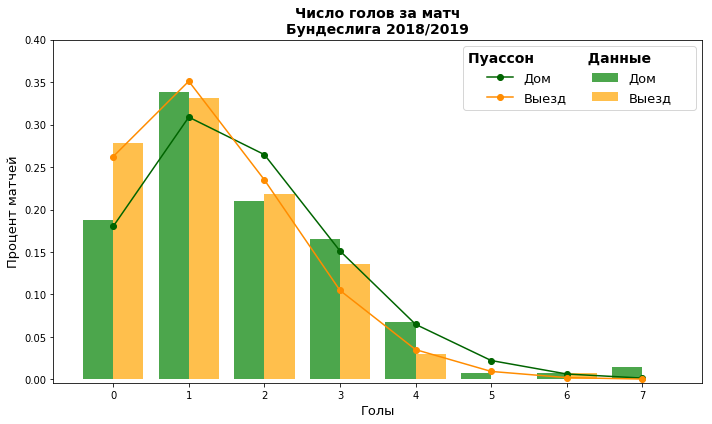

In [113]:
# construct Poisson for each goals value
poisson_pred = np.column_stack([[poisson.pmf(i, df.mean()[j]) for i in range(8)] for j in range(0, 2)])

# plot histogram of actual goals
plt.hist(df[['FTHG', 'FTAG']].values, range(9), 
         alpha=0.7, label=['Дом', 'Выезд'], normed=True, color=["green", "orange"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1, 9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Дом", color = 'darkgreen')
pois2, = plt.plot([i-0.5 for i in range(1, 9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Выезд", color = 'darkorange')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Пуассон           Данные        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1, 9)],[i for i in range(8)])
plt.xlabel("Голы", size=13)
plt.ylabel("Процент матчей", size=13)
plt.title("Число голов за матч\nБундеслига 2018/2019", size=14, fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

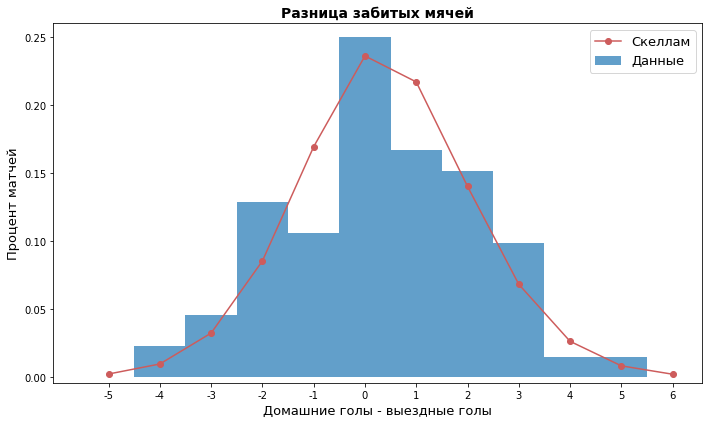

In [114]:
skellam_pred = [skellam.pmf(i,  df.mean()[0],  df.mean()[1]) for i in range(-5,7)]

plt.hist(df[['FTHG']].values - df[['FTAG']].values, range(-5,7), 
         alpha=0.7, label='Данные',normed=True)
plt.plot([i+0.5 for i in range(-5,7)], skellam_pred,
                  linestyle='-', marker='o',label="Скеллам", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-5,7)],[i for i in range(-5,7)])
plt.xlabel("Домашние голы - выездные голы",size=13)
plt.ylabel("Процент матчей",size=13)
plt.title("Разница забитых мячей",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [115]:
# probability of draw
skellam.pmf(0.0,  df.mean()[0],  df.mean()[1])

0.23610387176347772

In [116]:
# probability of winning with one goal of the home team
skellam.pmf(1,  df.mean()[0],  df.mean()[1])

0.21701452383390987

In [117]:
# probability of winning with one goal of the away team
skellam.pmf(-1,  df.mean()[0],  df.mean()[1])

0.16942361948436824

## Training model

In [118]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Full time goals

In [119]:
goal_model_data = pd.concat([df[['HomeTeam', 'AwayTeam', 'FTHG']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'FTHG':'goals'}),
            df[['AwayTeam','HomeTeam','FTAG']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'FTAG':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  266
Model:                            GLM   Df Residuals:                      230
Model Family:                 Poisson   Df Model:                           35
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -381.52
Date:                Tue, 18 Dec 2018   Deviance:                       255.52
Time:                        17:10:16   Pearson chi2:                     226.
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.2499      0.309      0.808      0.419      -0.356       0.856
team[T.Bayern Munich]              0.3631      0.283      1.283      0.199      -0.191       0.917
team[T.Dortmund]                   0.6468      0.271      2.389      0.017       0.116       1.177
team[T.Ein Frankfurt]              0.4023      0.287      1.402      0.161      -0.160       0.965
team[T.Fortuna Dusseldorf]        -0.2502      0.334     -0.749      0.454      -0.905       0.405
team[T.Freiburg]                  -0.0502      0.319     -0.157      0.875      -0.675       0.575
team[T.Hannover]                  -0.2155      0.334     -0.644      0.519      -0.871       0.440
team[T.Hertha]                     0.1134      0.302      0.375      0.708      -0.479       0.706
team[T.Hoffenheim]                 0.3469      0.287      1.210      0.226      -0.215       0.909
team[T.Leverkusen]                 0.0001      0.315      0.000      1.000      -0.617       0.617
team[T.M'gladbach]                 0.4391      0.282      1.560      0.119      -0.113       0.991
team[T.Mainz]                     -0.4963      0.355     -1.397      0.162      -1.193       0.200
team[T.Nurnberg]                  -0.4184      0.348     -1.204      0.229      -1.100       0.263
team[T.RB Leipzig]                 0.1286      0.301      0.427      0.669      -0.462       0.719
team[T.Schalke 04]                -0.2594      0.334     -0.777      0.437      -0.914       0.395
team[T.Stuttgart]                 -0.6455      0.374     -1.728      0.084      -1.378       0.087
team[T.Werder Bremen]              0.1238      0.299      0.415      0.678      -0.461       0.709
team[T.Wolfsburg]                  0.0636      0.306      0.208      0.835      -0.536       0.663
opponent[T.Bayern Munich]         -0.2301      0.314     -0.732      0.464      -0.846       0.386
opponent[T.Dortmund]              -0.3727      0.332     -1.124      0.261      -1.023       0.277
opponent[T.Ein Frankfurt]         -0.2806      0.320     -0.877      0.380      -0.908       0.346
opponent[T.Fortuna Dusseldorf]     0.3132      0.273      1.148      0.251      -0.221       0.848
opponent[T.Freiburg]              -0.0441      0.291     -0.152      0.879      -0.614       0.526
opponent[T.Hannover]               0.2862      0.270      1.059      0.290      -0.244       0.816
opponent[T.Hertha]                -0.0764      0.296     -0.258      0.796      -0.657       0.504
opponent[T.Hoffenheim]            -0.1092      0.301     -0.363      0.717      -0.700       0.481
opponent[T.Leverkusen]             0.1215      0.288      0.422      0.673      -0.442       0.685
opponent[T.M'gladbach]            -0.3672      0.325     -1.128      0.259      -1.005       0.271
opponent[T.Mainz]                 -0.3392      0.332     -1.022      0.307      -0.990       

In [120]:
home_goals_avg = poisson_model.predict(pd.DataFrame(data={'team': 'Ein Frankfurt', 'opponent': 'Leverkusen',
                                       'home':1},index=[1]))
print(f"Average amount of goals per match for Ein Frankfurt at home:\t {home_goals_avg[1]}")

Average amount of goals per match for Ein Frankfurt at home:	 2.8111625824749678


In [121]:
away_goals_avg = poisson_model.predict(pd.DataFrame(data={'team': 'Leverkusen', 'opponent': 'Ein Frankfurt',
                                       'home':0},index=[1]))
print(f"Average amount of goals per match for Leverkusen away:\t {away_goals_avg[1]}")

Average amount of goals per match for Leverkusen away:	 0.9698525312836197


In [122]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]

    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
    
simulate_match(poisson_model, 'Ein Frankfurt', 'Leverkusen', max_goals=3)

array([[ 0.02279954,  0.02211219,  0.01072278,  0.00346651],
       [ 0.0640932 ,  0.06216095,  0.03014348,  0.00974491],
       [ 0.0900882 ,  0.08737227,  0.04236911,  0.01369726],
       [ 0.08441753,  0.08187256,  0.03970215,  0.01283508]])

In [123]:
ley_bor = simulate_match(poisson_model, "Ein Frankfurt", "Leverkusen", max_goals=10)
# Ein Frankfurt win
np.sum(np.tril(ley_bor, -1))

0.75492765204289025

In [124]:
# draw
np.sum(np.diag(ley_bor))

0.14260941628585933

In [125]:
# Leverkusen win
np.sum(np.triu(ley_bor, 1))

0.10229357185759931

In [126]:
for i in range(5):
    print(f"Ein Frankfurt's {i} goals probability: ", sum(ley_bor[i]))

Ein Frankfurt's 0 goals probability:  0.0601350393505
Ein Frankfurt's 1 goals probability:  0.169049372518
Ein Frankfurt's 2 goals probability:  0.237612635307
Ein Frankfurt's 3 goals probability:  0.222655916499
Ein Frankfurt's 4 goals probability:  0.156480495307


In [127]:
for i in range(5):
    print(f"Leverkusen's {i} goals probability: ", sum(ley_bor.T[i]))

Leverkusen's 0 goals probability:  0.379074737009
Leverkusen's 1 goals probability:  0.367646593234
Leverkusen's 2 goals probability:  0.178281489533
Leverkusen's 3 goals probability:  0.0576355846348
Leverkusen's 4 goals probability:  0.0139745044125


### Goals per halves

#### First half

In [128]:
goal_model_data = pd.concat([df[['HomeTeam', 'AwayTeam', 'HTHG']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'HTHG':'goals'}),
            df[['AwayTeam','HomeTeam','HTAG']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'HTAG':'goals'})])

poisson_model_half1 = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model_half1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  266
Model:                            GLM   Df Residuals:                      230
Model Family:                 Poisson   Df Model:                           35
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -240.05
Date:                Tue, 18 Dec 2018   Deviance:                       230.92
Time:                        17:10:20   Pearson chi2:                     230.
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.3155      0.586     -2.245      0.025      -2.464      -0.167
team[T.Bayern Munich]              0.6191      0.441      1.404      0.160      -0.245       1.483
team[T.Dortmund]                   0.6319      0.441      1.432      0.152      -0.233       1.497
team[T.Ein Frankfurt]              0.3456      0.468      0.739      0.460      -0.571       1.263
team[T.Fortuna Dusseldorf]        -0.6434      0.615     -1.046      0.296      -1.849       0.563
team[T.Freiburg]                   0.2066      0.490      0.422      0.673      -0.754       1.167
team[T.Hannover]                  -0.0804      0.521     -0.154      0.877      -1.102       0.941
team[T.Hertha]                     0.4043      0.457      0.884      0.377      -0.492       1.301
team[T.Hoffenheim]                -0.0999      0.521     -0.192      0.848      -1.120       0.920
team[T.Leverkusen]                 0.2732      0.477      0.572      0.567      -0.662       1.209
team[T.M'gladbach]                 0.3046      0.478      0.637      0.524      -0.633       1.242
team[T.Mainz]                     -0.6906      0.616     -1.122      0.262      -1.897       0.516
team[T.Nurnberg]                  -0.9220      0.680     -1.355      0.175      -2.255       0.411
team[T.RB Leipzig]                 0.4701      0.461      1.020      0.308      -0.433       1.373
team[T.Schalke 04]                -0.9715      0.679     -1.430      0.153      -2.303       0.360
team[T.Stuttgart]                 -0.9351      0.679     -1.378      0.168      -2.266       0.395
team[T.Werder Bremen]              0.3443      0.470      0.733      0.463      -0.576       1.265
team[T.Wolfsburg]                 -0.1265      0.519     -0.244      0.807      -1.143       0.891
opponent[T.Bayern Munich]          0.4276      0.590      0.725      0.468      -0.728       1.583
opponent[T.Dortmund]               0.5426      0.574      0.945      0.345      -0.583       1.668
opponent[T.Ein Frankfurt]         -0.1336      0.675     -0.198      0.843      -1.457       1.189
opponent[T.Fortuna Dusseldorf]     0.4652      0.573      0.811      0.417      -0.659       1.589
opponent[T.Freiburg]               0.5403      0.561      0.964      0.335      -0.559       1.639
opponent[T.Hannover]               0.8373      0.535      1.565      0.118      -0.211       1.886
opponent[T.Hertha]                 0.5175      0.572      0.905      0.365      -0.603       1.638
opponent[T.Hoffenheim]             0.5726      0.561      1.021      0.307      -0.527       1.672
opponent[T.Leverkusen]             0.4031      0.588      0.686      0.493      -0.749       1.555
opponent[T.M'gladbach]             0.4496      0.574      0.783      0.434      -0.676       1.575
opponent[T.Mainz]                 -0.1102      0.674     -0.163      0.870      -1.432       

In [142]:
ley_bor_half1 = simulate_match(poisson_model_half1, "Ein Frankfurt", "Leverkusen", max_goals=10)
# Ein Frankfurt win
np.sum(np.tril(ley_bor_half1, -1))

0.42460930645534622

In [130]:
# draw
np.sum(np.diag(ley_bor_half1))

0.43467900451128599

In [131]:
# Leverkusen win
np.sum(np.triu(ley_bor_half1, 1))

0.14071168855951033

#### Second half

In [132]:
df['STHG'] = df['FTHG'] - df['HTHG']
df['STAG'] = df['FTAG'] - df['HTAG']

In [133]:
goal_model_data = pd.concat([df[['HomeTeam', 'AwayTeam', 'STHG']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'STHG':'goals'}),
            df[['AwayTeam','HomeTeam','STAG']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'STAG':'goals'})])

poisson_model_half2 = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model_half2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  266
Model:                            GLM   Df Residuals:                      230
Model Family:                 Poisson   Df Model:                           35
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -305.10
Date:                Tue, 18 Dec 2018   Deviance:                       224.48
Time:                        17:10:21   Pearson chi2:                     195.
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0122      0.373      0.033      0.974      -0.719       0.743
team[T.Bayern Munich]              0.1832      0.371      0.494      0.622      -0.544       0.911
team[T.Dortmund]                   0.6554      0.343      1.911      0.056      -0.017       1.327
team[T.Ein Frankfurt]              0.4367      0.363      1.202      0.229      -0.275       1.149
team[T.Fortuna Dusseldorf]        -0.0739      0.404     -0.183      0.855      -0.865       0.718
team[T.Freiburg]                  -0.2360      0.424     -0.557      0.577      -1.066       0.594
team[T.Hannover]                  -0.3079      0.437     -0.705      0.481      -1.164       0.549
team[T.Hertha]                    -0.1294      0.410     -0.315      0.753      -0.934       0.675
team[T.Hoffenheim]                 0.5360      0.350      1.533      0.125      -0.149       1.221
team[T.Leverkusen]                -0.2138      0.424     -0.505      0.614      -1.044       0.617
team[T.M'gladbach]                 0.5031      0.350      1.437      0.151      -0.183       1.189
team[T.Mainz]                     -0.3951      0.437     -0.905      0.366      -1.251       0.461
team[T.Nurnberg]                  -0.2222      0.413     -0.538      0.591      -1.032       0.588
team[T.RB Leipzig]                -0.1231      0.403     -0.305      0.760      -0.913       0.667
team[T.Schalke 04]                 0.0150      0.395      0.038      0.970      -0.759       0.789
team[T.Stuttgart]                 -0.5100      0.451     -1.130      0.258      -1.395       0.375
team[T.Werder Bremen]             -0.0190      0.388     -0.049      0.961      -0.780       0.742
team[T.Wolfsburg]                  0.1664      0.380      0.438      0.661      -0.578       0.911
opponent[T.Bayern Munich]         -0.5060      0.382     -1.325      0.185      -1.254       0.242
opponent[T.Dortmund]              -0.8862      0.445     -1.991      0.046      -1.759      -0.014
opponent[T.Ein Frankfurt]         -0.3280      0.364     -0.902      0.367      -1.041       0.385
opponent[T.Fortuna Dusseldorf]     0.2770      0.311      0.891      0.373      -0.332       0.886
opponent[T.Freiburg]              -0.2784      0.348     -0.800      0.424      -0.960       0.404
opponent[T.Hannover]               0.0716      0.319      0.224      0.823      -0.554       0.697
opponent[T.Hertha]                -0.3168      0.353     -0.896      0.370      -1.010       0.376
opponent[T.Hoffenheim]            -0.4101      0.372     -1.102      0.270      -1.139       0.319
opponent[T.Leverkusen]             0.0340      0.332      0.103      0.918      -0.616       0.684
opponent[T.M'gladbach]            -0.7928      0.425     -1.866      0.062      -1.625       0.040
opponent[T.Mainz]                 -0.4028      0.383     -1.053      0.292      -1.153       

In [134]:
ley_bor_half2 = simulate_match(poisson_model_half2, "Ein Frankfurt", "Leverkusen", max_goals=10)
# Ein Frankfurt win
np.sum(np.tril(ley_bor_half2, -1))

0.72595065591090813

In [135]:
# draw
np.sum(np.diag(ley_bor_half2))

0.18227452402506034

In [136]:
# Leverkusen win
np.sum(np.triu(ley_bor_half2, 1))

0.091762056888964466

In [137]:
print('\nFirst half:')
for i in range(5):
    print(f"Ein Frankfurt's {i} goals probability: ", sum(ley_bor_half1[i]))
print()
for i in range(5):
    print(f"Leverkusen's {i} goals probability: ", sum(ley_bor_half1.T[i]))

print('\nSecond time:')
for i in range(5):
    print(f"Ein Frankfurt's {i} goals probability: ", sum(ley_bor_half2[i]))
print()
for i in range(5):
    print(f"Leverkusen's {i} goals probability: ", sum(ley_bor_half2.T[i]))


First half:
Ein Frankfurt's 0 goals probability:  0.476398010452
Ein Frankfurt's 1 goals probability:  0.35324989543
Ein Frankfurt's 2 goals probability:  0.130967684461
Ein Frankfurt's 3 goals probability:  0.0323709166323
Ein Frankfurt's 4 goals probability:  0.00600077176251

Leverkusen's 0 goals probability:  0.734530838313
Leverkusen's 1 goals probability:  0.226619876958
Leverkusen's 2 goals probability:  0.0349587559526
Leverkusen's 3 goals probability:  0.00359519689729
Leverkusen's 4 goals probability:  0.00027730050122

Second time:
Ein Frankfurt's 0 goals probability:  0.122939201064
Ein Frankfurt's 1 goals probability:  0.257688599024
Ein Frankfurt's 2 goals probability:  0.270066071245
Ein Frankfurt's 3 goals probability:  0.188692044361
Ein Frankfurt's 4 goals probability:  0.0988777138158

Leverkusen's 0 goals probability:  0.554956838256
Leverkusen's 1 goals probability:  0.326787540658
Leverkusen's 2 goals probability:  0.0962147768687
Leverkusen's 3 goals probability